# Django API Development & Deployment

## Session 2: Database & Backend Development
* Django Models & Django  object-relational mapper (ORM)
* Setting up SQLite/PostgreSQL
* Creating models & migrations
* Querying the database with Django ORM
* Views & Templates
* Django’s MTV ((Model-Template-View)) architecture
* Views & Rendering templates
* Static files handling (CSS, JS, Images)

### Projects and applications

Throughout this training sessions, you will encounter the terms project and application over and over. In Django, a project is considered a Django installation with some settings. An application is a group of models, views, templates, and URLs. Applications interact with the framework to provide specific functionalities and may be reused in various projects. You can think of a project as your website, which contains several applications, such as a blog, wiki, or forum, that can also be used by other Django projects.

Figure shows the structure of a Django project:

<div style="max-width:200px;margin-right: auto; margin-right: 0;">
    
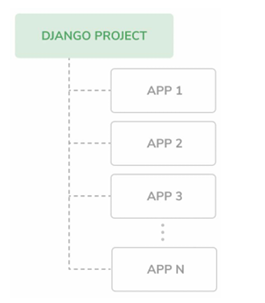
    
</div>

#### Creating an application

Let’s create our first Django application. We will build a blog application from scratch.

Run the following command in the anaconda prompt from the project’s root directory:

**python manage.py startapp blog**

This will create the basic structure of the application, which will look like this:

<div style="max-width:200px;margin-right: auto; margin-right: 0;">
    
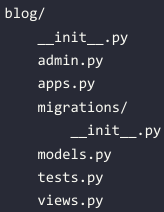  
</div>

These files are as follows:
* __init__.py: This is an empty file that tells Python to treat the blog directory as a Python module.
* admin.py: This is where you register models to include them in the Django administration site—using this site is optional.
* apps.py: This includes the main configuration of the blog application.
* migrations: This directory will contain database migrations of the application. Migrations allow Django to track your model changes and synchronize the database accordingly. This directory contains an empty __init__.py file.
* models.py: This includes the data models of your application; all Django applications need to have a models.py file but it can be left empty.
* tests.py: This is where you can add tests for your application.
* views.py: The logic of your application goes here; each view receives an HTTP request, processes it, and returns a response.


With the application structure ready, we can start building the data models for the blog.

### Creating the blog data models

Python object is a collection of data and methods. Classes are the blueprint for bundling data and functionality together. Creating a new class creates a new type of object, allowing you to create instances of that type.

A Django model is a source of information about the behaviors of your data. It consists of a Python 
class that subclasses django.db.models.Model. Each model maps to a single database table, where 
each attribute of the class represents a database field. 

When you create a model, Django will provide you with a practical API to query objects in the data
base easily.

We will define the database models for our blog application. Then, we will generate the database migrations for the models to create the corresponding database tables. When applying the migrations, Django will create a table for each model defined in the models.py file of the application.

### Creating the Post model

First, we will define a Post model that will allow us to store blog posts in the database.

Add the following lines to the models.py file of the blog application.

This is the data model for blog posts. Posts will have a title, a short label called slug, and a body. Let’s take a look at the fields of this model:
* title: This is the field for the post title. This is a CharField field that translates into a VARCHAR column in the SQL database.
* slug: This is a SlugField field that translates into a VARCHAR column in the SQL database. A slug is a short label that contains only letters, numbers, underscores, or hyphens. A post with the title Django Reinhardt: A legend of Jazz could have a slug like django-reinhardt-legend-jazz. We will use the slug field to build beautiful, SEO-friendly URLs for blog posts in Chapter 2, Enhancing Your Blog with Advanced Features.
* body: This is the field for storing the body of the post. This is a TextField field that translates into a TEXT column in the SQL database.

We have also added a __str__() method to the model class. This is the default Python method to return a string with the human-readable representation of the object. Django will use this method to display the name of the object in many places, such as the Django administration site.

Let’s take a look at how the model and its fields will be translated into a database table and columns. 

The following diagram shows the Post model and the corresponding database table that Django will 
create when we synchronize the model to the database:

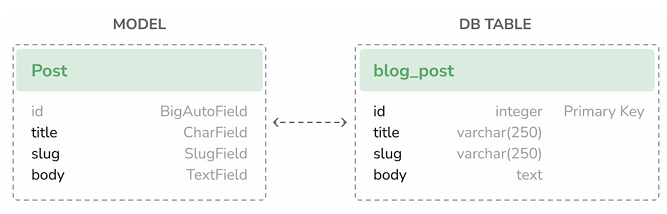

Django will create a database column for each of the model fields: title, slug, and body. You can see how each field type corresponds to a database data type.

By default, Django adds an auto-incrementing primary key field to each model. The field type for this field is specified in each application configuration or globally in the DEFAULT_AUTO_FIELD setting. When creating an application with the startapp command, the default value for DEFAULT_AUTO_FIELD is BigAutoField. This is a 64-bit integer that automatically increments according to available IDs. If you don’t specify a primary key for your model, Django adds this field automatically. You can also define one of the model fields to be the primary key by setting primary_key=True on it.

We will expand the Post model with additional fields and behaviors. Once complete, we will synchronize it to the database by creating a database migration and applying it.

### Adding datetime fields

We will continue by adding different datetime fields to the Post model. Each post will be published at a specific date and time. Therefore, we need a field to store the publication date and time. We also want to store the date and time when the Post object was created and when it was last modified.

Edit the models.py file of the blog application to make it look like this;

We have added a publish field to the Post model. This is a DateTimeField field that translates into a DATETIME column in the SQL database. We will use it to store the date and time when the post was 
published. We use Django’s timezone.now method as the default value for the field. Note that we imported the timezone module to use this method. timezone.now returns the current datetime in a timezone-aware format. You can think of it as a timezone-aware version of the standard Python 
datetime.now method.

We have added the following fields to the Post model:
* created: This is a DateTimeField field. We will use it to store the date and time when the post was created. By using auto_now_add, the date will be saved automatically when creating an object.
* updated: This is a DateTimeField field. We will use it to store the last date and time when the post was updated. By using auto_now, the date will be updated automatically when saving an object.

### Defining a default sort order

Blog posts are typically presented in reverse chronological order, showing the newest posts first. For our model, we will define a default ordering. This ordering takes effect when retrieving objects from the database unless a specific order is indicated in the query.

Edit the models.py file of the blog application as shown below.

We have added a Meta class inside the model. This class defines metadata for the model. We use the 
ordering attribute to tell Django that it should sort results by the publish field. This ordering will apply by default for database queries when no specific order is provided in the query. We indicate
descending order by using a hyphen before the field name, -publish. Posts will be returned in reverse 
chronological order by default.

Edit the models.py file of the blog application and make it look like this; 

We have added the indexes option to the model’s Meta class. This option allows you to define database indexes for your model, which could comprise one or multiple fields, in ascending or descending order, or functional expressions and database functions. We have added an index for the publish field. We use a hyphen before the field name to define the index specifically in descending order. The creation of this index will be included in the database migrations that we will generate later for our blog models.


### Activating the application

We need to activate the blog application in the project for Django to keep track of the application and be able to create database tables for its models.

Edit the settings.py file and add blog.apps.BlogConfig to the INSTALLED_APPS setting. It should look like this; 

The BlogConfig class is the application configuration. Now Django knows that the application is active for this project and will be able to load the application models.

### Adding a status field

A common functionality for blogs is to save posts as a draft until ready for publication. We will add a status field to our model that will allow us to manage the status of blog posts. We will be using the Draft and Published statuses for posts.

Edit the models.py file of the blog application to make it look as follows.

We have defined the enumeration class Status by subclassing models.TextChoices. The available 
choices for the post status are DRAFT and PUBLISHED. Their respective values are DF and PB, and their labels or readable names are Draft and Published.

### Adding a many-to-one relationship

Posts are always written by an author. We will create a relationship between users and posts that 
will indicate which user wrote which posts. Django comes with an authentication framework that  handles user accounts. The Django authentication framework comes in the django.contrib.auth package and contains a User model. To define the relationship between users and posts, we will use 
the AUTH_USER_MODEL setting, which points to auth.User by default. This setting allows you to specify a different user model for your project.

Edit the models.py file of the blog application to make it look as follows.

### Creating model managers

### Creating and applying migrations

Now that we have a data model for blog posts, we need to create the corresponding database table. 
Django comes with a migration system that tracks the changes made to models and enables them to 
propagate into the database.

The migrate command applies migrations for all applications listed in INSTALLED_APPS. It synchronizes the database with the current models and existing migrations.

First, we will need to create an initial migration for our Post model.

Run the following command in the anaconda prompt from the root directory of your project:

**python manage.py makemigrations blog**

Django just created the 0001_initial.py file inside the migrations directory of the blog application. 
This migration contains the SQL statements to create the database table for the Post model and the definition of the database index for the publish field.

Run the following command from the shell prompt to inspect the SQL output of your first migration:

**python manage.py sqlmigrate blog 0001**

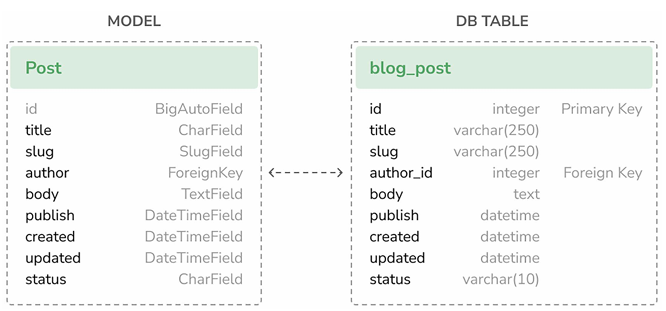

Let’s sync the database with the new model.

Execute the following command in the anaconda prompt to apply the existing migrations:
 
**python manage.py migrate**

### Creating an administration site for models

Now that the Post model is in sync with the database, we can create a simple administration site to manage blog posts.

Django comes with a built-in administration interface that is very useful for editing content. The Django site is built dynamically by reading the model metadata and providing a production-ready 
interface for editing content. You can use it out of the box, configuring how you want your models to 
be displayed in it.

The django.contrib.admin application is already included in the INSTALLED_APPS setting, so you 
don’t need to add it.

### Creating a superuser

First, you will need to create a user to manage the administration site. Run the following command:

**python manage.py createsuperuser**

You will see the following output. Enter your desired username, email, and password, as follows:
 
Username (leave blank to use 'admin'): admin

Email address: admin@admin.com

Password: ********

Password (again): *********

### The Django administration site

Start the development server with the following command:

**python manage.py runserver**

### Adding models to the administration site

Let’s add our blog models to the administration site. Edit the admin.py file of the blog application  and make it look like this;

### Customizing how models are displayed

Now, we will take a look at how to customize the administration site.

Edit the admin.py file of your blog application and change it, as follows.

Let’s customize the admin model with some more options.

Edit the admin.py file of your blog application and change it, as follows.

### Working with QuerySets and managers

Now that we have a fully functional administration site to manage blog posts, it is a good time to learn how to read and write content to the database programmatically.

The Django object-relational mapper (ORM) is a powerful database abstraction API that lets you 
create, retrieve, update, and delete objects easily. An ORM allows you to generate SQL queries using the object-oriented paradigm of Python. You can think of it as a way to interact with your database in a Pythonic fashion instead of writing raw SQL queries.

The ORM maps your models to database tables and provides you with a simple Pythonic interface to 
interact with your database. The ORM generates SQL queries and maps the results to model objects. 
The Django ORM is compatible with MySQL, PostgreSQL, SQLite, Oracle, and MariaDB.

### Creating objects

Run the following command in the anaconda prompt to open the Python shell:

**python manage.py shell**

### Retrieving objects

## Building list and detail views

Now that you understand how to use the ORM, you are ready to build the views of the blog application. 
A Django view is just a Python function that receives a web request and returns a web response. All the logic to return the desired response goes inside the view.

First, you will create your application views, then you will define a URL pattern for each view, and 
finally, you will create HTML templates to render the data generated by the views. Each view will 
render a template, passing variables to it, and will return an HTTP response with the rendered output.

### Creating list and detail views 
Let’s start by creating a view to display the list of posts.

Edit the views.py file of the blog application and make it look like this;

Let’s create a second view to display a single post. Add the following function to the views.py file:

### Adding URL patterns for your views

URL patterns allow you to map URLs to views. A URL pattern is composed of a string pattern, a view, 
and, optionally, a name that allows you to name the URL project-wide. Django runs through each URL 
pattern and stops at the first one that matches the requested URL. Then, Django imports the view 
of the matching URL pattern and executes it, passing an instance of the HttpRequest class and the keyword or positional arguments.

Create a urls.py file in the directory of the blog application and add the following lines to it:

Next, you have to include the URL patterns of the blog application in the main URL patterns of the 
project.

Edit the urls.py file located in the mysite directory of your project and make it look like the following. 

## Creating templates for your views

You have created views and URL patterns for the blog application. URL patterns map URLs to views, 
and views decide which data gets returned to the user. Templates define how the data is displayed; 
they are usually written in HTML in combination with the Django template language.

Let’s add templates to your application to display posts in a user-friendly manner.

Create the following directories and files inside your blog application directory

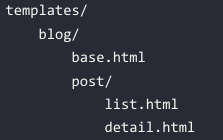

### Creating a base template

Edit the base.html file and add the following code:

### Creating the post list template

Let’s edit the post/list.html file and make it look like the following:

### Creating the post template

 Next, edit the post/detail.html file:

## Expected Output

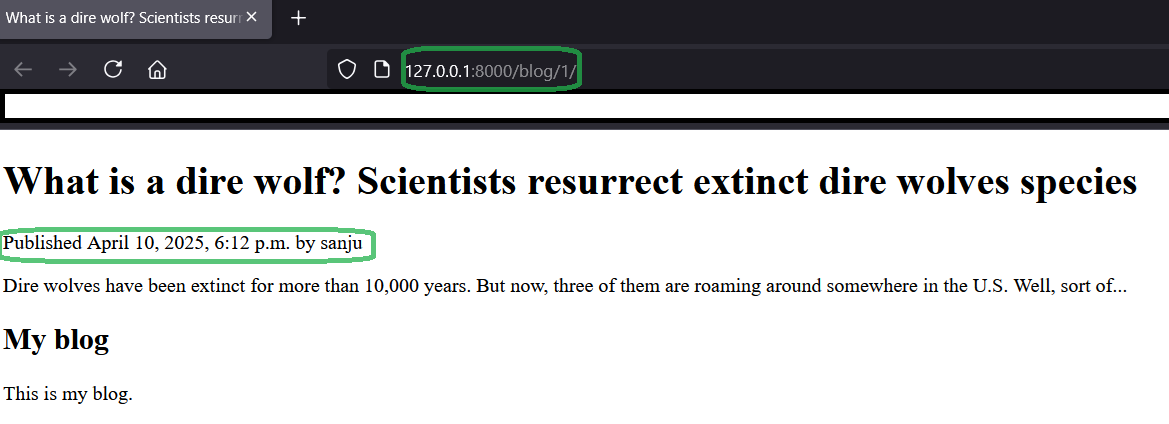

*Reference Book: "Django 5 By Example Fifth Edition, Antonio Melé"*